# Exploring results (RD maps DARTEL)

In [2]:
%run /home/grg/git/alfa/nilearn-helper.py
%matplotlib inline

/home/grg/jupyter/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
paramtype = 'RD'
analysis_name='%s_DARTEL'%paramtype
analyses_homedir = '/home/grg/spm/analyses/analysis_20170505/'
analysis_wd = osp.join(analyses_homedir , analysis_name)
nodes = [pickle.load(gzip.open(osp.join(analysis_wd, e, '_node.pklz'), 'rb')) 
         for e in ['modeldesign', 'estimatemodel','estimatecontrasts']]
print 'Found nodes .pklz files:', nodes

Found nodes .pklz files: [RD_DARTEL.modeldesign, RD_DARTEL.estimatemodel, RD_DARTEL.estimatecontrasts]


In [4]:
n1, n2, n3 = nodes
print 'Used mask:', n1.inputs.explicit_mask_file
print '# of scans included in the analysis:', len(n1.inputs.in_files), '(first one: %s)'%n1.inputs.in_files[0]
display_html(pd.DataFrame([e for e in n3.inputs.contrasts], 
             columns=['contrast name', 'contrast type', 'covariate names', 'covariate weights']))

Used mask: /home/grg/spm/MNI_T1_brain_wo_csf.nii
# of scans included in the analysis: 500 (first one: /home/grg/dartel_RD/srwr10070_RD_t1space_nohdr.nii)


,contrast name,contrast type,covariate names,covariate weights
0,Apo2-3>Apo2-4,T,"[Apoe2-3, Apoe2-4]","[1.0, -1.0]"
1,Apo2-4>Apo3-3,T,"[Apoe2-4, Apoe3-3]","[1.0, -1.0]"
2,Apo3-3>Apo3-4,T,"[Apoe3-3, Apoe3-4]","[1.0, -1.0]"
3,Apo3-4>Apo4-4,T,"[Apoe3-4, Apoe4-4]","[1.0, -1.0]"
4,Main effect ApoE,F,"[(Apo2-3>Apo2-4, T, [Apoe2-3, Apoe2-4], [1.0, ...",None
5,C<NC,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4]","[3.0, -2.0, 3.0, -2.0, -2.0]"
6,C>NC,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4]","[-3.0, 2.0, -3.0, 2.0, 2.0]"
7,HO<All,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4]","[1.0, 1.0, 1.0, 1.0, -4.0]"
8,HO>All,T,"[Apoe2-3, Apoe2-4, Apoe3-3, Apoe3-4, Apoe4-4]","[-1.0, -1.0, -1.0, -1.0, 4.0]"
9,HO<HT,T,"[Apoe2-4, Apoe3-4, Apoe4-4]","[1.0, 1.0, -2.0]"


In [8]:
mode = 'uncorrected'
#glassbrain_allcontrasts(analysis_wd, paramtype, mode=mode)

In [5]:
spm_mat_file = osp.join(n3.output_dir(), 'SPM.mat')
out = pyAAL.pyAAL(spm_mat_file, 9, k=10, mode=2)
pyAAL.to_dataframe(out)

creating tempfile /tmp/tmp22nkRN.m
matlab -nodisplay -nodesktop -nosplash -nojvm -r "addpath('/home/grg/spm/analyses/analysis_20170313/MD_DARTEL_csf5/estimatecontrasts');run('/tmp/tmp22nkRN');quit"

Contrast: HO>All


,"x,y,z {mm}",nom du label,% Cluster,Nb Vx Cluster,% Label,Nb Vx Label,
0,-18 -76 22,Cingulate_Post_L,74.96,1158,187.47,463,
1,-18 -76 22,Fusiform_L,8.29,1158,4.16,2310,
2,-18 -76 22,Occipital_Mid_L,8.20,1158,2.91,3270,
3,-18 -76 22,Temporal_Inf_L,3.54,1158,1.28,3200,
4,-18 -76 22,Occipital_Sup_L,1.73,1158,1.46,1366,
5,-18 -76 22,Temporal_Mid_L,0.95,1158,0.22,4942,
6,-18 -76 22,Calcarine_L,0.60,1158,0.31,2258,
7,-18 -76 22,Cuneus_L,0.52,1158,0.39,1526,
8,-18 -76 22,Precuneus_L,0.17,1158,0.06,3528,
9,-18 -76 22,OUTSIDE,0.09,1158,0.00,0,


/home/grg/spm/analyses/analysis_20170505/RD_DARTEL/estimatecontrasts/spmT_0004.nii T
Saving to... /tmp/tmpqUNI6C.png


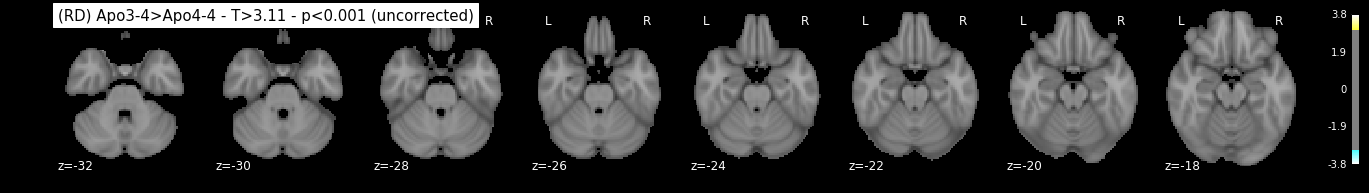

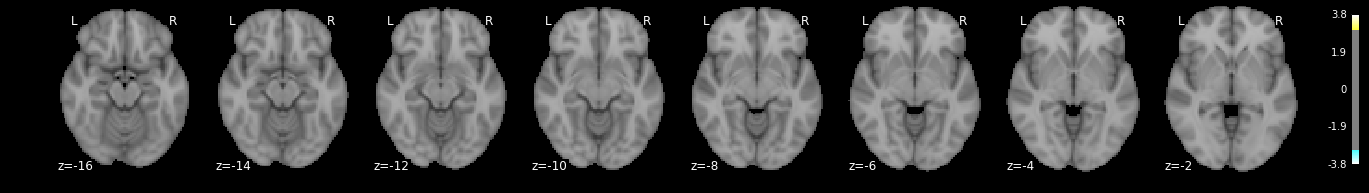

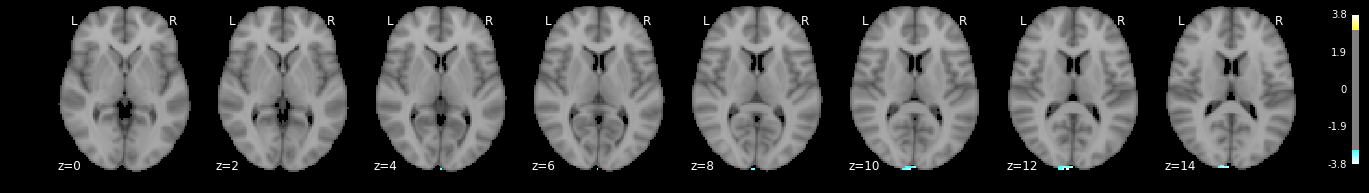

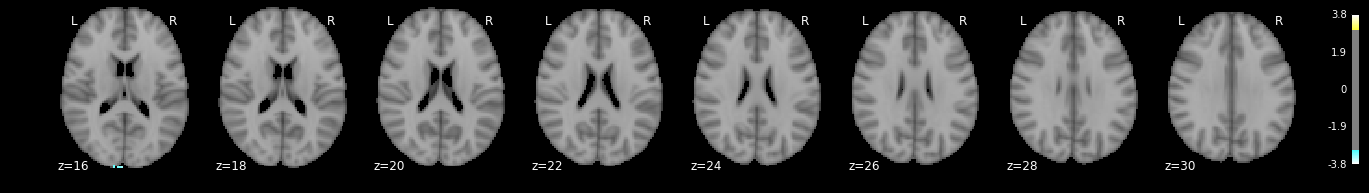

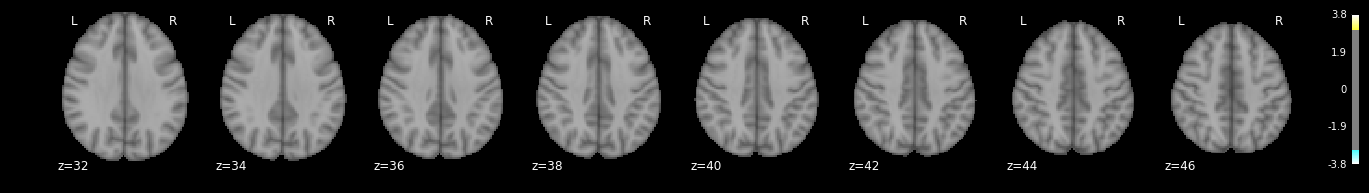

In [6]:
sections = sections_allcontrasts(analysis_wd, paramtype, axis='z', contrasts=[4])